In [1]:
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats as stats
import scipy.spatial as spa

In [2]:
X = np.genfromtxt("hw07_data_set.csv", delimiter = ",")
initial_centroids = np.genfromtxt("hw07_initial_centroids.csv", delimiter = ",")


In [3]:
N = X.shape[0]
D = X.shape[1]
K = initial_centroids.shape[0]


In [4]:
means = np.array([[+2.5, +2.5],
                        [-2.5, +2.5],
                        [-2.5, -2.5],
                        [+2.5, -2.5],
                        [+0.0, +0.0]])
covs = np.array([[[+0.8, -0.6],
                               [-0.6, +0.8]],
                              [[+0.8, +0.6],
                               [+0.6, +0.8]],
                              [[+0.8, -0.6],
                               [-0.6, +0.8]],
                              [[+0.8, +0.6],
                               [+0.6, +0.8]],
                              [[+1.6, +0.0],
                               [+0.0, +1.6]]])

In [5]:
centroids = initial_centroids
print(centroids)

[[-3.0439416   0.32509753]
 [-0.30377397  3.73480678]
 [ 1.17587258 -2.50984601]
 [ 0.91037084  0.87608158]
 [-1.98588337  2.98466811]]


In [6]:
memberships = np.argmin(spa.distance_matrix(centroids, X), axis = 0)


In [7]:
covariance = np.asarray([np.cov(X[memberships == c].T) for c in range(K)])
print(covariance)
initial_covs = covariance

[[[ 0.72460882 -0.09363982]
  [-0.09363982  2.43159725]]

 [[ 1.20552404  0.09804621]
  [ 0.09804621  0.25609701]]

 [[ 3.85520557  0.70466893]
  [ 0.70466893  0.83882316]]

 [[ 2.01230805  0.77086144]
  [ 0.77086144  1.18330963]]

 [[ 0.48312539  0.02859399]
  [ 0.02859399  0.3961811 ]]]


In [8]:
priors = np.asarray([np.mean(memberships == c) for c in range(K)])

In [9]:
H = np.zeros((N,K))

In [10]:
def calculate_priors(H):
    return(np.mean(H, axis = 0))

In [11]:
def calculate_centroids(X, H):
    cs =[]
    for c in range(K):
        ml = np.matmul(H[c], X)
        print(H[c, :].sum())
        ml = ml / H[c, :].sum()
        cs.append(ml)
    return np.asarray(cs)
    

In [12]:
def calculate_covariance(X, H, centroids):
    covariance = np.zeros((K, D, D))
    for c in range(K):
        for i in range(N):
            covariance[c] += H[i][c]*np.matmul((X[i] - centroids[c]).reshape(2,1), (X[i] - centroids[c]).reshape(1,2))
        covariance[c] /= H[:,c].sum()
    return covariance

    

In [13]:

def update_memberships(centroids, X):
    # calculate distances between centroids and data points
    D = spa.distance_matrix(centroids, X)
    # find the nearest centroid for each data point
    memberships = np.argmin(D, axis = 0)
    return memberships

In [14]:
iteration = 100
for i in range(iteration):

    #E-step
    #H = np.asarray([stats.multivariate_normal.pdf(X, mean=centroids[c], cov = covariance[c])*priors[c] for c in range(K)]
                  #/ np.sum([stats.multivariate_normal.pdf(X, mean=centroids[c], cov = covariance[c]) for c in range(K)], axis=0)).T
    
    H_nom = np.asarray([stats.multivariate_normal.pdf(X, mean = centroids[c], cov = covariance[c]) * priors[c] for c in range(K)]).T
    H = np.asarray([H_nom[:,c] / np.sum(H_nom,axis=1) for c in range(K)]).T
    
    centroids = calculate_centroids(X, H.T)
    priors = calculate_priors(H)
    covariance = calculate_covariance(X, H, centroids)
    memberships = update_memberships(centroids, X)

51.15979886199521
18.25520359674404
91.09249525622835
107.89537777310954
31.597124511922853
48.77472752388334
18.843572373689
87.33531455320562
110.22057110036614
34.8258144488559
46.20939599093019
19.401942158875027
84.1497703724995
111.6792284263109
38.55966305138437
44.043513587062584
19.54611251976421
81.05003974433028
113.01952965865382
42.34080449018912
42.69225506095586
19.273131640160685
77.75770316323768
114.44851295325708
45.8283971823887
42.33055439025448
18.70608555108471
74.07833308003015
115.94801848702858
48.93700849160209
43.033977746115234
18.037993997178233
69.97798229941615
117.39901638085988
51.5510295764305
44.553644198318025
17.55015453857704
65.81419872825093
118.75419582863468
53.32780670621932
45.848324697440425
17.451463149696835
62.082083964761495
120.22050535023773
54.39762283786352
46.82219125994255
17.919079018829798
58.581317064858105
121.85121639796284
54.8261962584067
47.503823303288144
18.896540732854795
55.13714092132017
123.52621921921263
54.93627582

49.2507332208789
43.85018762698578
49.83895070447901
103.5316869492155
53.52844149844082
49.25075467053283
43.85019505216738
49.83894988368818
103.53166061588861
53.52843977772299
49.250773328164904
43.85020151080296
49.83894916970957
103.53163771038008
53.52843828094249
49.25078955720376
43.85020712871468
49.838948548646904
103.53161778647346
53.528436978961196
49.25080367377132
43.85021201534407
49.83894800841086
103.53160045604281
53.528435846430924


In [15]:
print(H)


[[4.10824611e-51 9.30435581e-01 5.57446211e-26 6.95644190e-02
  1.16024274e-10]
 [2.04263829e-39 8.73127597e-01 8.57650043e-03 1.18295903e-01
  3.31036304e-43]
 [1.16560735e-45 9.75340376e-01 4.83236765e-14 2.46596240e-02
  4.80249909e-22]
 ...
 [7.45476475e-24 1.71125245e-06 1.18098935e-13 9.99998289e-01
  2.62616648e-18]
 [2.08029771e-12 4.39066913e-21 2.04648167e-21 1.00000000e+00
  5.96681067e-11]
 [2.07157719e-22 5.37979308e-07 6.47450167e-35 9.98881616e-01
  1.11784643e-03]]


In [3]:
colors = np.array(["#1f78b4", "#33a02c", "#e31a1c", "#ff7f00", "#6a3d9a", "#b15928",
                               "#a6cee3", "#b2df8a", "#fb9a99", "#fdbf6f", "#cab2d6", "#ffff99"])

memberships = np.argmin(spa.distance_matrix(centroids, X), axis = 0)
plt.figure(figsize=(8, 8))
for c in range(K):
    plt.plot(X[memberships == c, 0], X[memberships == c, 1], ".", markersize = 10,
                     color = colors[c])

x1_interval = np.arange(-5, +5, 0.05)
x2_interval = np.arange(-5, +5, 0.05)
x1_grid, x2_grid = np.meshgrid(x1_interval, x2_interval)
coordinates = np.empty(x1_grid.shape + (2,))                
coordinates[:, :, 0] = x1_grid
coordinates[:, :, 1] = x2_grid 

for i in range(K):
    pdf1 = stats.multivariate_normal(means[i], covs[i])
    pdf2 = stats.multivariate_normal(centroids[i], covariance[i])
    plt.contour(x1_grid, x2_grid, pdf1.pdf(coordinates),1, colors = 'k',linestyles='dashed', levels=[0.05])
    plt.contour(x1_grid, x2_grid, pdf2.pdf(coordinates),1,colors =colors[i], levels=[0.05])

plt.show()

NameError: name 'centroids' is not defined

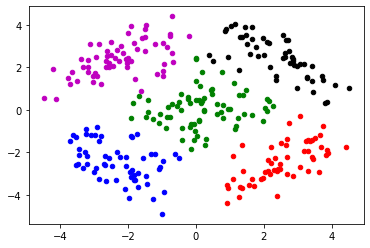

In [17]:
clusters = np.argmin(spa.distance_matrix(centroids, X), axis = 0)
colors = [".b",".k",".r",".g",".m"]
for c in range(K):  
    plt.plot(X[clusters == c, 0],X[clusters == c,1], colors[c],markersize=9)
plt.show()